# Make Animation from pickels files

In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import platform
from joblib import Parallel, delayed

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.eps'

In [2]:
import multiprocessing
from joblib import Parallel, delayed
num_jobs=30

In [4]:
## Task specific imports
import os as os
#import keras.utils as image
import glob
from PIL import Image, ImageDraw
import pickle

In [5]:
import math
 

## Choosing Platform
Working is beinging conducted on several computers, and author needs to be able to run code on all without rewriting..  This segment of determines which computer is being used, and sets the directories accordingly.

In [6]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"
    
if Computer ==  "SciClone":
    rootfolder = '/sciclone/scr10/dchendrickson01/EFIT/'
    
else:
    asdfasdf

## Load data

In [7]:
Case = '20m15XRfRqb'
CasesAtaTime = 2
FilesAtTime = 5
ProcessPerFile = 5
Position = 0 #0 Energy, 1 X axis, 2 Y Axis, 3 X axis
skips = 2 #1 every data point, or skip what modulous

imFolder=rootfolder+Case+'/'
fileNames = glob.glob(imFolder+'Movements*.p')

Views=[]

In [8]:
fileName = imFolder+'Parameters.p'

file=open(fileName,'rb')
Parameters=pickle.load(file)

file.close()


In [9]:
xmax = Parameters["LargestXnode"]
ymax = Parameters["LargestYnode"]
zmax = Parameters["LargestZnode"]
gridStartWeb = Parameters["WidthStartWebNode"]
gridEndWeb = Parameters["WidthEndWebNode"]
gridEndFoot = Parameters["HeightEndFootNode"]
gridStartHead = Parameters["HeightStartHeadNode"]
gridStartHeadWidth = Parameters["WidthStartHeadNode"]
gridEndHeadWidth = Parameters["WidthEndHeadNode"]
DataBucketSize = Parameters["SaveEveryXStep"]

In [10]:
Parameters

{'AirCut': False,
 'RailShape': True,
 'Flaw': False,
 'Length': 20,
 'Width': 0.1524,
 'Height': 0.1524,
 'SaveFolder': '/sciclone/scr10/dchendrickson01/EFIT/20m15XRfRqb/',
 'RunTitle': '20m Rail At 15x long for 1k FP',
 'TiesIncluded': 0,
 'GridDesignFrequency': 74574,
 'InputSignalFrequency': 16300,
 'SimulationCycleLength': 60,
 'ForcingFuctionNumber': 6,
 'PerWheelForce': 173000,
 'PoisonsRatio': 0.29,
 'YoungsModulous': 200000000000,
 'MaterialDensity': 7800,
 'LongitudinalWaveSpeed': 5796.653896162343,
 'TransverseWaveSpeeed': 3152.519949406393,
 'TimeStepsSimLength': 18193,
 'GridLengthNodes': 6000,
 'GridWidthNodes': 45,
 'GridHeightNodes': 45,
 'LargestXnode': 5678,
 'LargestYnode': 44,
 'LargestZnode': 44,
 'SaveEveryXStep': 125,
 'HeightStartHeadNode': 29,
 'WidthStartWebNode': 17,
 'WidthEndWebNode': 27,
 'HeightEndFootNode': 9,
 'WidthStartHeadNode': 8,
 'WidthEndHeadNode': 36,
 'AbsorberLengthNodes': 101,
 'AbsorptionPerNode': 0.5,
 'ExpectedGoodData': 13576.298409016745

## Image making functions

In [11]:
def getPreStrippedData(fileName):
    file=open(fileName,'rb')
    temp = pickle.load(file)
    file.close()
    return temp

In [12]:
def SimpleFig(Data, t, v, figW, figH, Folder):
    
    fig = plt.figure(figsize=(figH,figW), dpi=300)

    Data = Data.T
    
    #print(Data.shape)
    
    plt.contourf(Data, v, cmap=plt.cm.jet)
    plt.title(Folder+' '+str(t))
    plt.savefig(imFolder+Folder+'/DataFrame'+str(t).zfill(5)+'.png')
    
    fig.clf()
    plt.close(fig)
    del fig

    return 0

In [13]:
def CaseImage(View):
    imfolder = rootfolder + Case + '/'+View+'/'
    files = glob.glob(os.path.join(imfolder, '*.png'))
    files.sort()
    images = []

    for file in files:
        images.append(image.load_img(file))
    try:
        images[0].save(rootfolder + Case + '/Animated_'+View+'.gif',
           save_all=True, append_images=images[1:], optimize=False, duration=40, loop=0)
    except:
        pass
    return 0

## make all the frames of all the cases

In [139]:
fileNames = glob.glob(imFolder+'Data*.p')

In [140]:
fileNames

['/sciclone/scr10/dchendrickson01/EFIT/20m15XRfRqb/Data-EndM4.p',
 '/sciclone/scr10/dchendrickson01/EFIT/20m15XRfRqb/Data-WebStart.p',
 '/sciclone/scr10/dchendrickson01/EFIT/20m15XRfRqb/Data-WebEnd.p',
 '/sciclone/scr10/dchendrickson01/EFIT/20m15XRfRqb/Data-TopSurface.p',
 '/sciclone/scr10/dchendrickson01/EFIT/20m15XRfRqb/Data-EndM2.p',
 '/sciclone/scr10/dchendrickson01/EFIT/20m15XRfRqb/Data-EndM4y.p']

In [150]:
Data = getPreStrippedData(fileNames[4])

In [151]:
Data.shape

(45, 45, 892)

In [122]:
xs = 0
xe = Data.shape[0]
ts = 180
te = Data.shape[2]
tt = 2

EMin = np.min(Data[xs:xe,:,ts:te])
EMax = np.max(Data[xs:xe,:,ts:te])
v = np.linspace(EMin, EMax, 30, endpoint=True)[0:20]

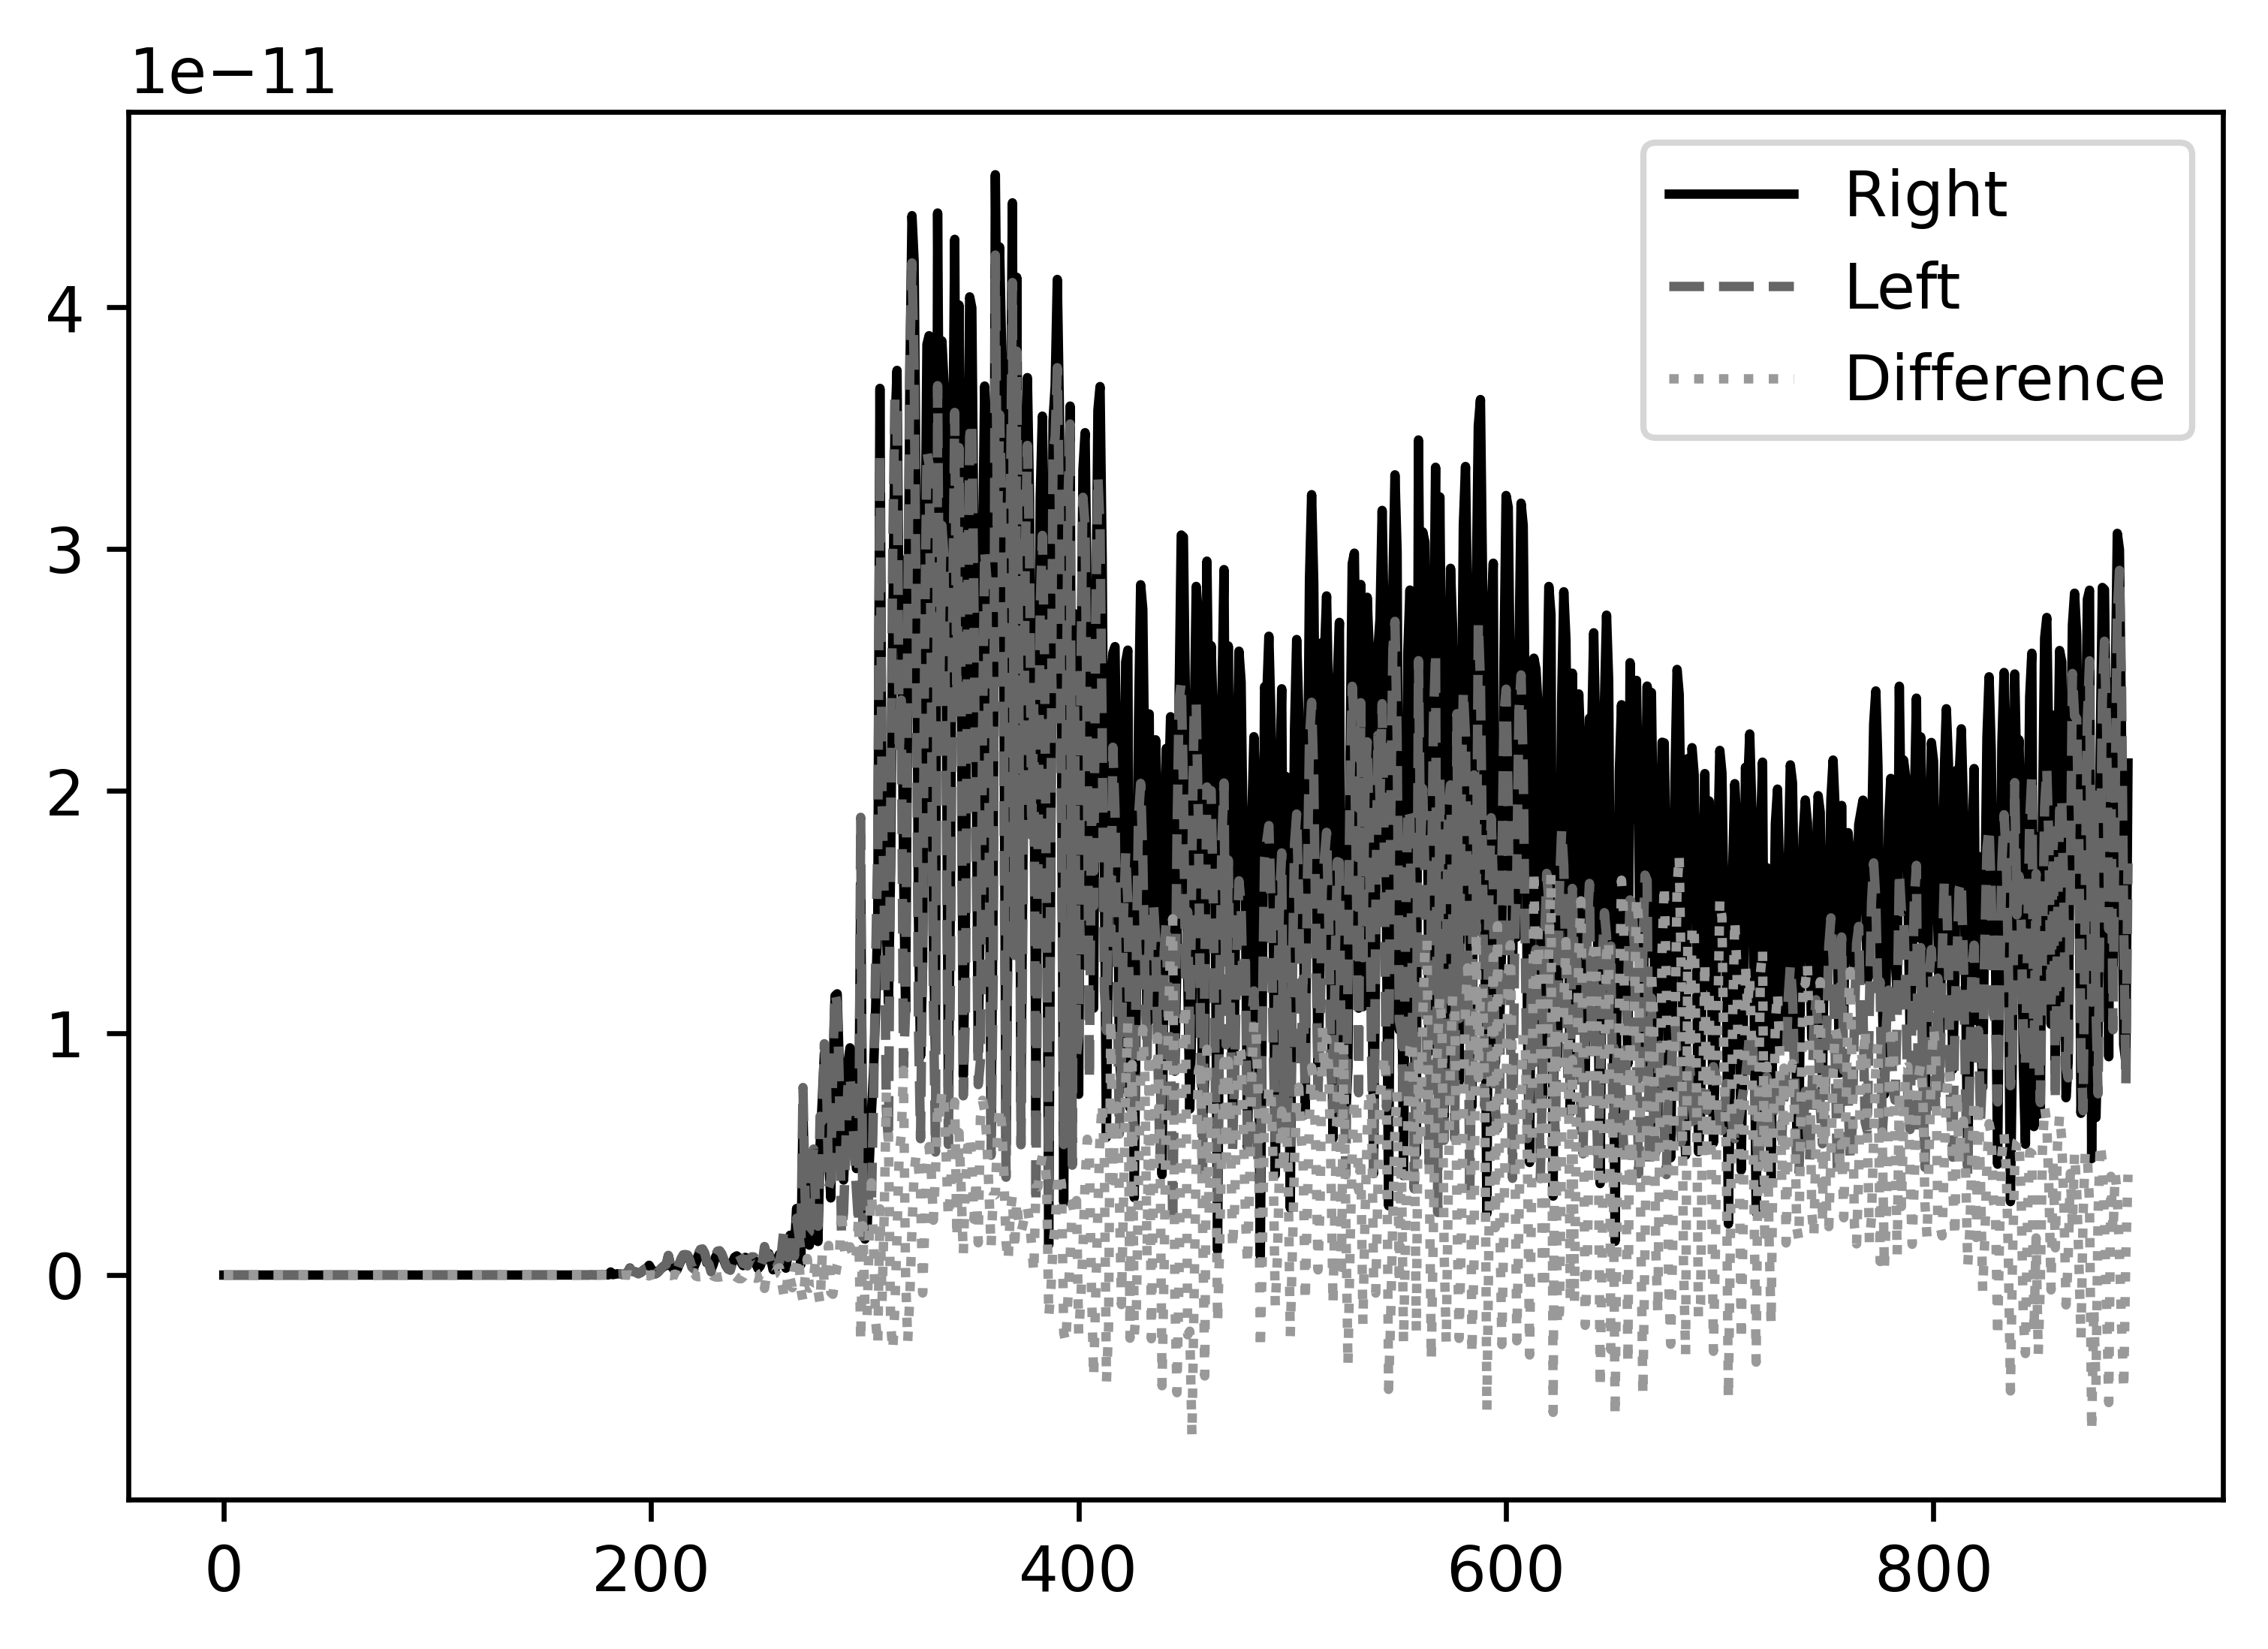

In [152]:
fig = plt.figure(figsize=(6,4),dpi=600)
plt.plot(Data[19,20,:],label='Right')
plt.plot(Data[27,20,:],label='Left')
plt.plot(Data[19,20,:]-Data[27,20,:], label='Difference')
plt.legend()
plt.show()

## FingerPrinting

In [23]:
import CoreFunctions as cf

In [148]:
Wvlt = 'coif4'
NumScales=300


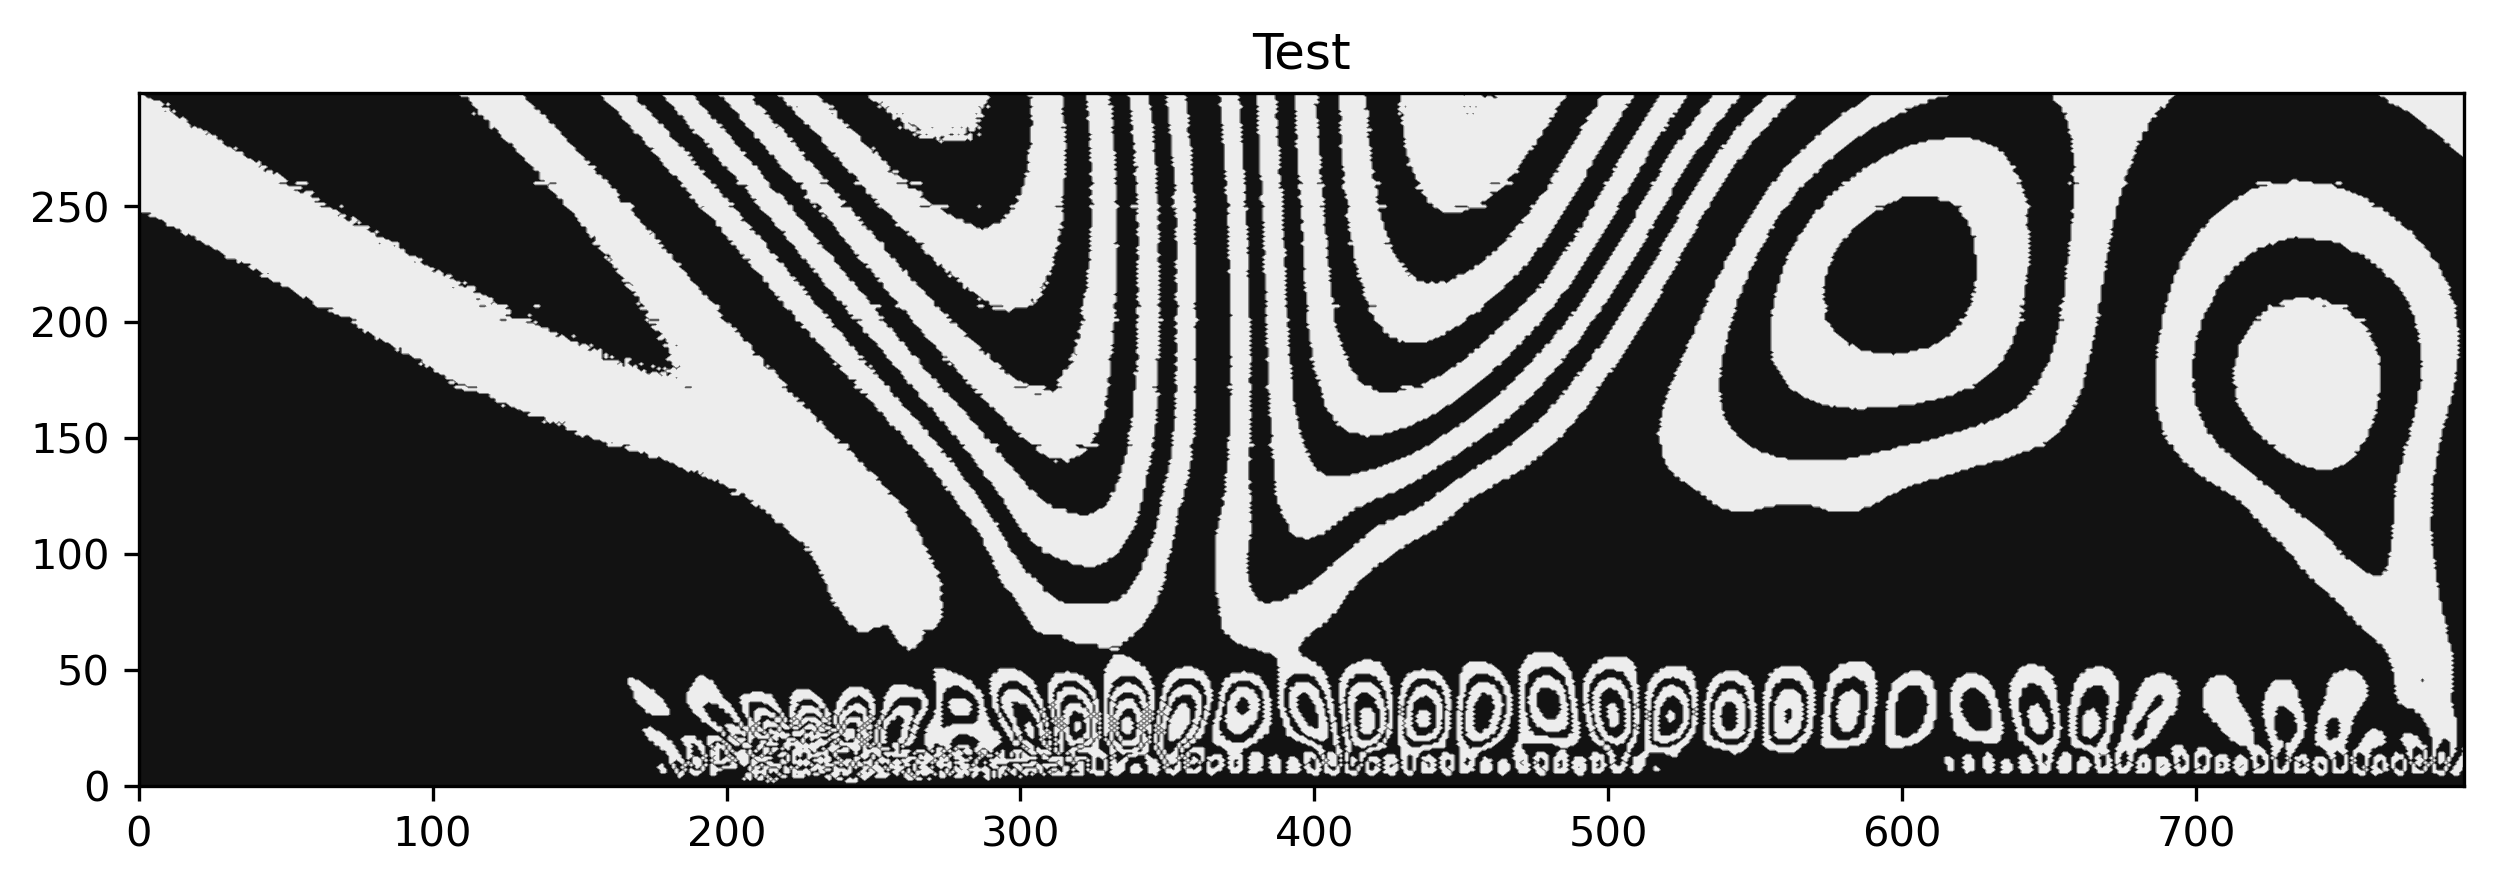

In [149]:
TP1 = cf.getThumbprint2(cf.Smoothing(Data[19,20,100:],3), wvt=Wvlt, ns=NumScales, scalespace = 1, numslices=10, slicethickness=0.12, 
                  valleysorpeaks='both', normconstant=1, plot=True)
fig = plt.figure(figsize=(10,3), dpi=300)

plt.contourf(TP1.T, cmap='gist_gray')
plt.title('Test')
plt.show()


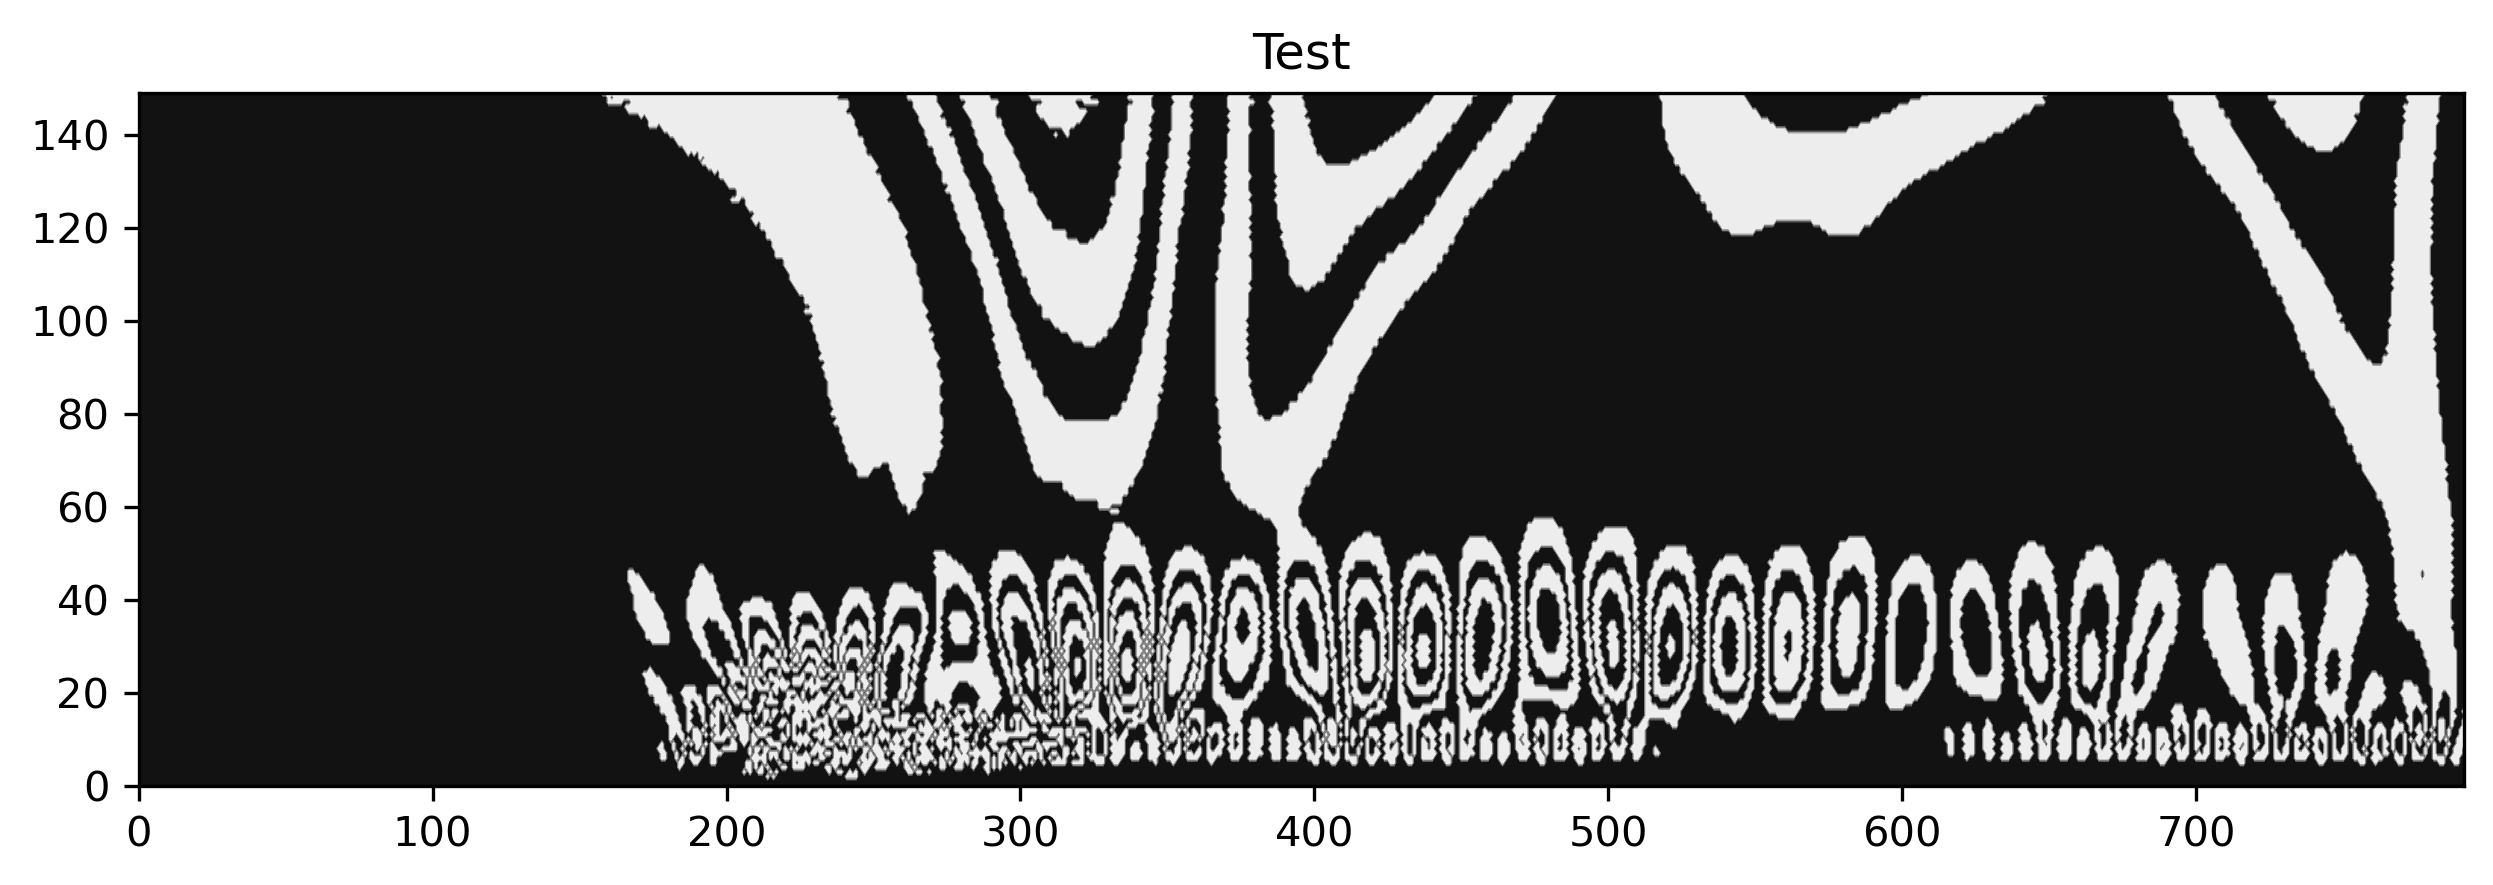

In [146]:
TP2 = cf.getThumbprint2(cf.Smoothing(Data[27,20,100:],3), wvt=Wvlt, ns=NumScales, 
                        scalespace = 1, numslices=10, slicethickness=0.12, 
                        valleysorpeaks='both', normconstant=1, plot=True)
fig = plt.figure(figsize=(10,3), dpi=300)

plt.contourf(TP1.T, cmap='gist_gray')
plt.title('Test')
plt.show()

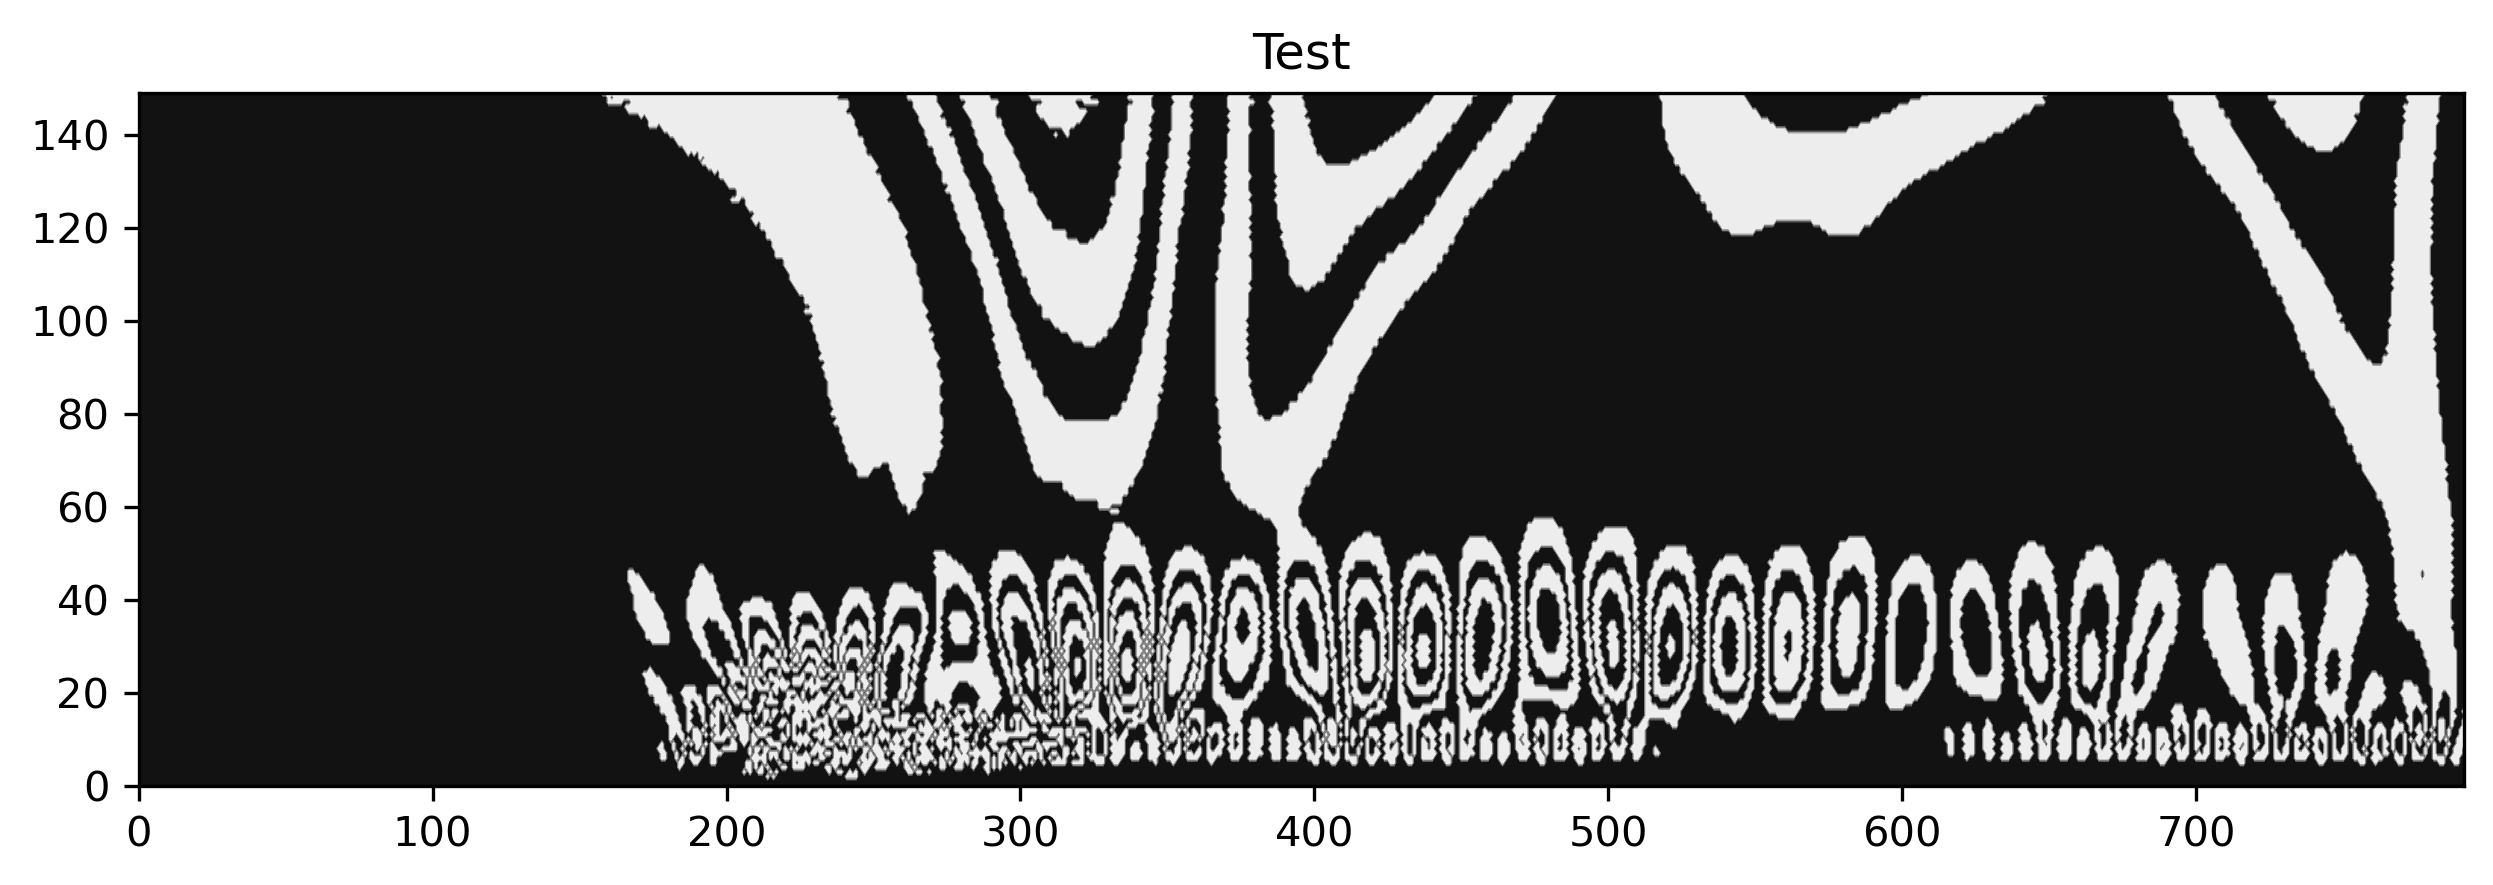

In [147]:
TPD = cf.getThumbprint2(cf.Smoothing(Data[19,20,100:]-Data[27,20,100:],3), wvt=Wvlt, ns=NumScales, 
                        scalespace = 1, numslices=10, slicethickness=0.12, 
                        valleysorpeaks='both', normconstant=1, plot=True)
fig = plt.figure(figsize=(10,3), dpi=300)

plt.contourf(TP1.T, cmap='gist_gray')
plt.title('Test')
plt.show()

## Tangent

In [128]:
for i in np.arange(ts,te,tt):
    fig = plt.figure(figsize=(5,5), dpi=600)
    plt.axis('off')
    plt.contourf(Data[xs:xe,:,i].T, cmap=plt.cm.jet)
    plt.savefig(imFolder+'qAni2/Image_'+str(i).zfill(4)+'.png')
    #plt.show()
    plt.close()

In [136]:
import glob
from PIL import Image

def make_gif(frame_folder):
    file_list = glob.glob('*.png') # Get all the pngs in the current directory
    list.sort(file_list, key=lambda x: int(x.split('_')[1].split('.png')[0]))
    frames = [Image.open(image) for image in file_list]
    frame_one = frames[0]
    frame_one.save("my_gif.gif", format="GIF", append_images=frames[1:], save_all=True, duration=int(len(frames)/2), loop=0)

make_gif(imFolder+'qAni2/')
